# Film Casus

Welkom bij het onderzoek van Team 1! 

- Gemaakt door Yula, Joel en Pim.

## Introduction 

In dit project gaan wij 2 filmdatasets onderzoeken.

We beantwoorden drie onderzoeksvragen.

## Data Understanding

**Alle imports**

In [1]:
import functies as fn
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np

**Laad de dataset**

In [2]:
dfr = pd.read_csv('data/movie-1.csv')

# Toon de maximale informatie die de dataframe kan geven.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formatteer alle grote getallen voor een betere leesbaarheid.
pd.set_option('display.float_format', '{:,.2f}'.format)

**Kopie van de dataset**


Een kopie van de gegevens maken om mee te werken,
zodat we het oorspronkelijke dataset niet wijzigen.

In [3]:
df = dfr.copy()

**Een kijkje nemen naar de gegevens die we hebben gekregen.**

In [4]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


**Haal de kolomnamen op om te zien met wat voor soort variabelen we werken**

In [5]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Meetniveaus

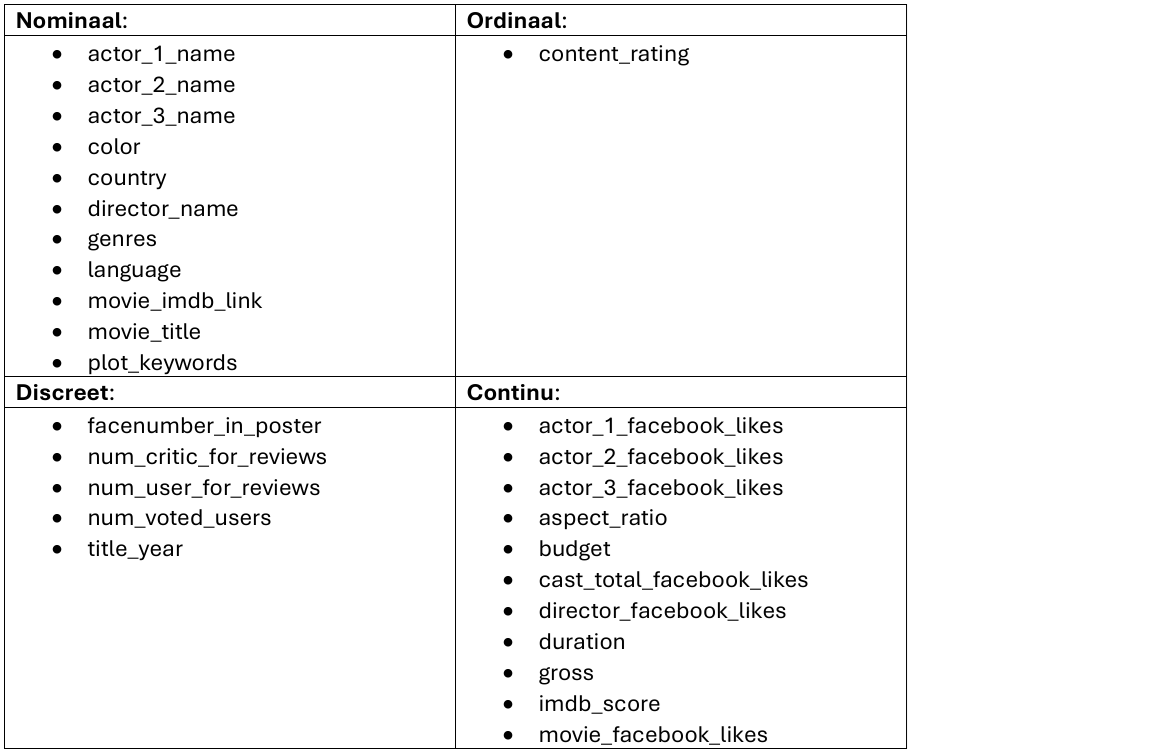

In [6]:
display(Image(filename="meetniveaus.png"))

**Doel- en kenmerkenvariabelen**


Voor feature variables gaan we een paar tabellen analyseren. De target variabel is al gegeven, namelijk de Gross column.
De gross is afhankelijk van de feature variables, die zijn onafhankelijk.

In [7]:
featureVariables = ['director_facebook_likes', 
                    'actor_1_facebook_likes', 
                    'actor_2_facebook_likes', 
                    'actor_3_facebook_likes', 
                    'cast_total_facebook_likes', 
                    'movie_facebook_likes', 
                    'imdb_score']

targetVariable = ['gross']

**Maak een andere dataframe met alleen de kolommen waarin we geïnteresseerd zijn.**

Door alleen deze te nemen, gaat onze dataset van 28 naar 13 kolommen.

In [8]:
print(df.shape) #check impact
df = df[featureVariables + targetVariable]
print(df.shape) #check impact

(5043, 28)
(5043, 8)


**Controleer NaN-waarden**

Verwijder voorlopig alle NaN-waarden in de kenmerken- en doelvariabelen. Later zullen we verder onderzoeken hoe we deze op de juiste manier kunnen verwerken.

In [9]:
df.isna().sum()

director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
imdb_score                     0
gross                        884
dtype: int64

We zullen alle NaN-waarden verwijderen. We kunnen ze niet vervangen, omdat de meerderheid onze doelvariabele bevat.

In [10]:
print(df.shape) #check impact
df = df.dropna()
print(df.shape) #check impact

(5043, 8)
(4143, 8)


**Nu zullen we alle kolommen analyseren om te controleren op anomalieën.**

Alle statistieken zien er schoon uit.

Alle kolommen met 'namen' bevatten NaN en getallen waar dit verwacht wordt.

Alle kolommen met 'likes' bevatten NaN en een getal waar dit verwacht wordt. Ook geen vreemde minimale of maximale waarden.

De kolom 'imdb_score' heeft alleen waarden tussen 0 en 10, wat verwacht wordt.

En tot slot heeft de kolom 'gross' een natuurlijke orde van grootte van min tot max.

In [11]:
df.describe(include="all")

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
count,"4,143.00","4,143.00","4,143.00","4,143.00","4,143.00","4,143.00","4,143.00","4,143.00"
mean,749.23,"7,361.56","1,892.58",724.28,"10,920.21","8,757.63",6.47,"48,625,081.48"
std,"2,950.71","15,067.61","4,374.79","1,811.38","18,541.78","20,822.02",1.05,"68,528,637.84"
min,0.00,0.00,0.00,0.00,0.00,0.00,1.60,162.00
25%,10.00,702.00,345.00,173.00,"1,755.50",0.00,5.90,"5,404,758.50"
50%,57.00,"1,000.00",651.00,416.00,"3,715.00",186.00,6.60,"25,592,632.00"
75%,218.50,"12,000.00",962.00,676.00,"15,601.50","10,000.00",7.20,"62,427,289.50"
max,"23,000.00","640,000.00","137,000.00","23,000.00","656,730.00","349,000.00",9.30,"760,505,847.00"


### Beschrijving variables

#### director_facebook_likes (Facebook likes voor de regisseur):  
Aantal waarden: 4143  
Gemiddelde: 749,23 likes  
Standaarddeviatie: 2950,71 likes (grote variatie in likes)  
Minimum: 0 likes  
25e percentiel: 10 likes  
Mediaan: 57 likes  
75e percentiel: 218,5 likes  
Maximum: 23.000 likes  

#### actor_1_facebook_likes (Facebook likes voor de hoofdacteur):  
Aantal waarden: 4143  
Gemiddelde: 7.361,56 likes  
Standaarddeviatie: 15.067,61 likes  
Minimum: 0 likes  
25e percentiel: 702 likes  
Mediaan: 1.000 likes  
75e percentiel: 12.000 likes  
Maximum: 640.000 likes  

#### actor_2_facebook_likes (Facebook likes voor de tweede acteur):  
Aantal waarden: 4143  
Gemiddelde: 1.892,58 likes  
Standaarddeviatie: 4.374,79 likes  
Minimum: 0 likes  
25e percentiel: 345 likes  
Mediaan: 651 likes  
75e percentiel: 962 likes  
Maximum: 137.000 likes  

#### actor_3_facebook_likes (Facebook likes voor de derde acteur):  
Aantal waarden: 4143  
Gemiddelde: 724,28 likes  
Standaarddeviatie: 1.811,38 likes  
Minimum: 0 likes  
25e percentiel: 173 likes  
Mediaan: 416 likes  
75e percentiel: 676 likes  
Maximum: 23.000 likes  

#### cast_total_facebook_likes (Totaal aantal Facebook likes voor de cast):  
Aantal waarden: 4143  
Gemiddelde: 10.920,21 likes  
Standaarddeviatie: 18.541,78 likes  
Minimum: 0 likes  
25e percentiel: 1.755,5 likes  
Mediaan: 3.715 likes  
75e percentiel: 15.601,5 likes  
Maximum: 656.730 likes  

#### movie_facebook_likes (Facebook likes voor de film):  
Aantal waarden: 4143  
Gemiddelde: 8.757,63 likes  
Standaarddeviatie: 20.822,02 likes  
Minimum: 0 likes  
25e percentiel: 0 likes  
Mediaan: 186 likes  
75e percentiel: 10.000 likes  
Maximum: 349.000 likes  

#### imdb_score (IMDb score):  
Aantal waarden: 4143  
Gemiddelde: 6,47  
Standaarddeviatie: 1,05  
Minimum: 1,6  
25e percentiel: 5,9  
Mediaan: 6,6  
75e percentiel: 7,2  
Maximum: 9,3  

#### gross (Bruto-opbrengst):  
Aantal waarden: 4143  
Gemiddelde: 48,63 miljoen USD  
Standaarddeviatie: 68,53 miljoen USD  
Minimum: 162 USD  
25e percentiel: 5,40 miljoen USD  
Mediaan: 25,59 miljoen USD  
75e percentiel: 62,43 miljoen USD  
Maximum: 760,51 miljoen USD  
oen USD
Minimum: 162 USD
25e percentiel: 5,34 miljoen USD
Mediaan: 25,52 miljoen USD
75e percentiel: 62,31 miljoen USD
Maximum: 760,51 miljoen USD

### Boxplots en uitschieters
We zullen geen van de uitschieters uit onze doelvariabele 'gross' verwijderen. Voor onze kenmerkenvariabelen zijn er echter enkele vreemde uitschieters en veel regisseurs en acteurs met 0 likes op Facebook. We moeten dieper ingaan op deze waarden en kijken of we die 0-waarden kunnen vervangen door iets anders.

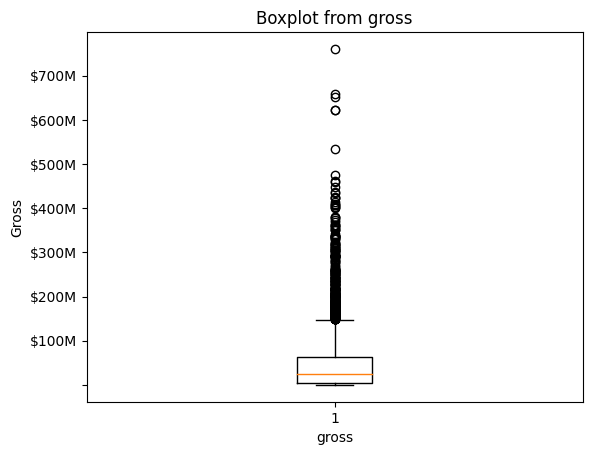

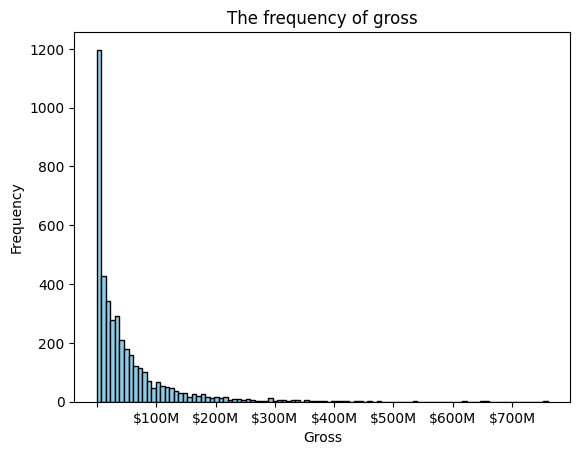

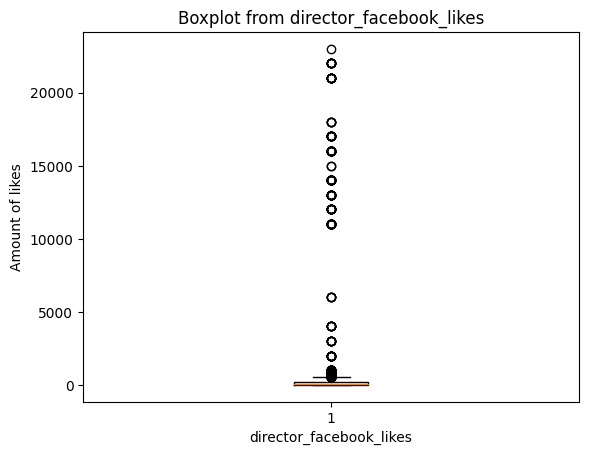

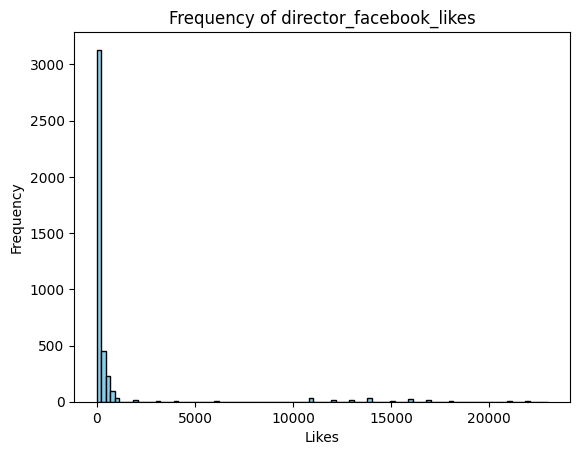

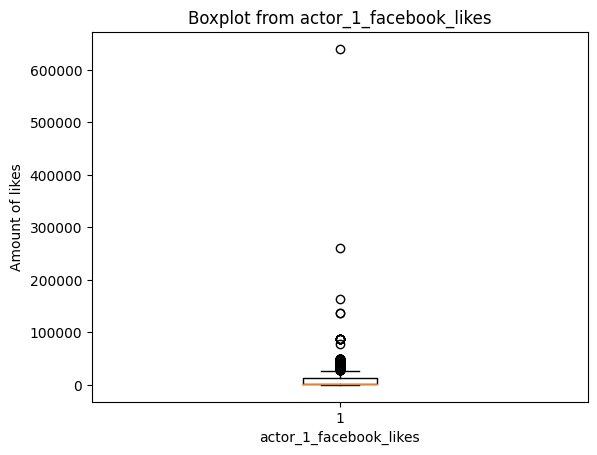

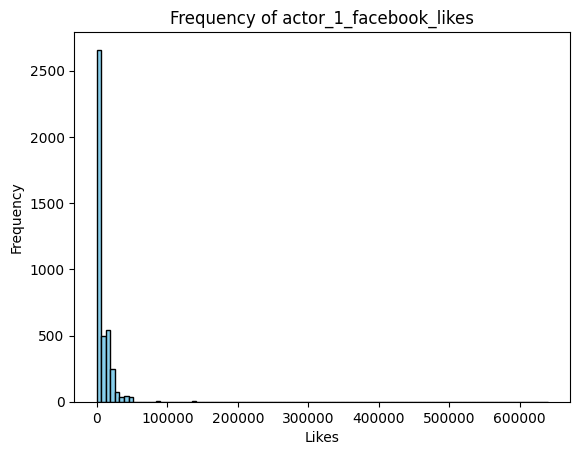

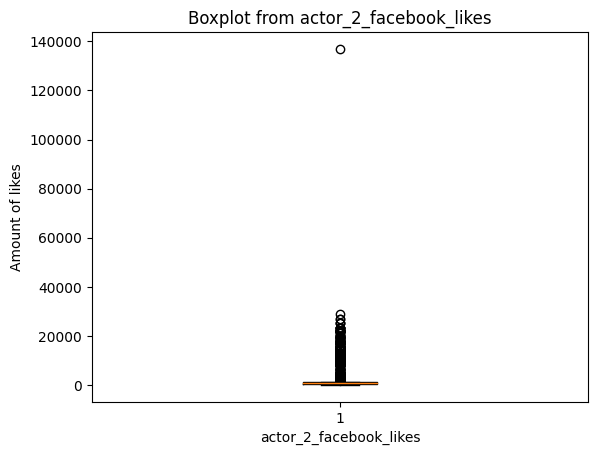

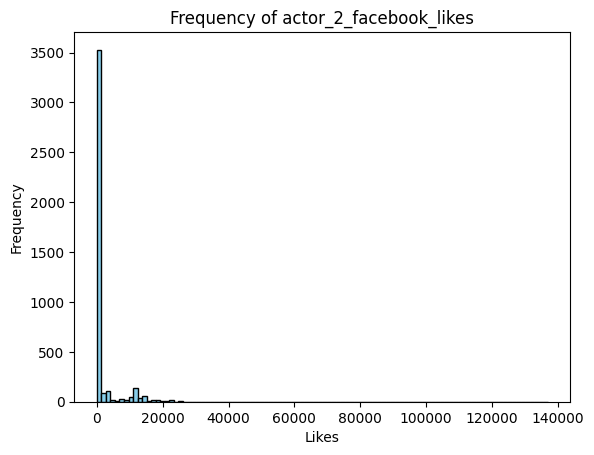

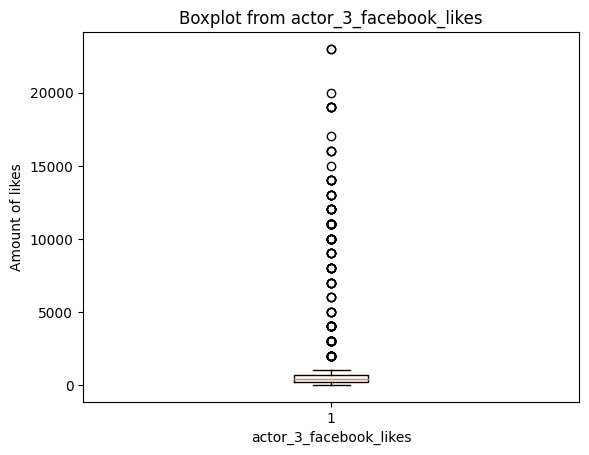

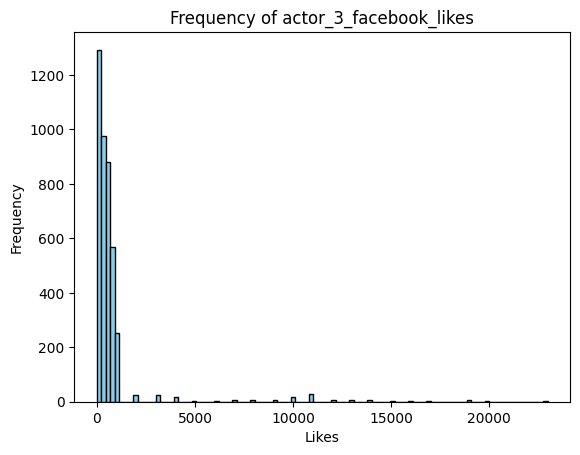

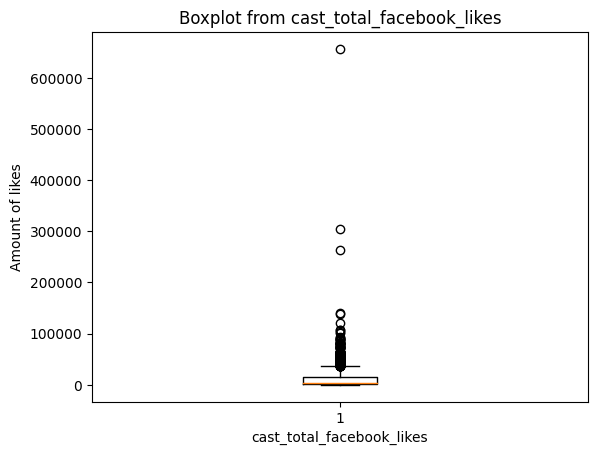

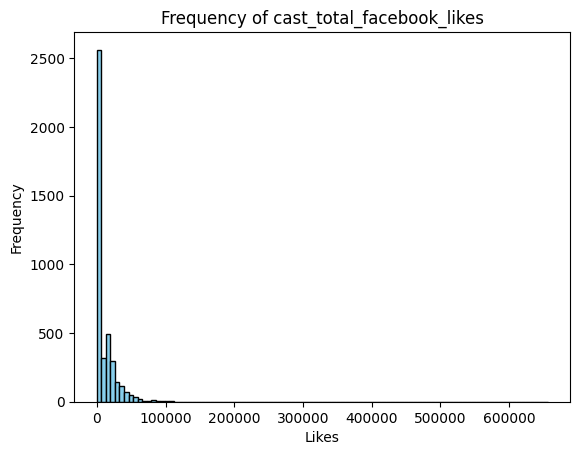

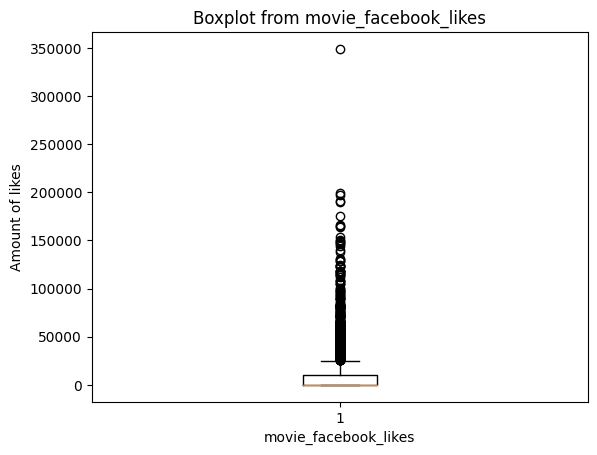

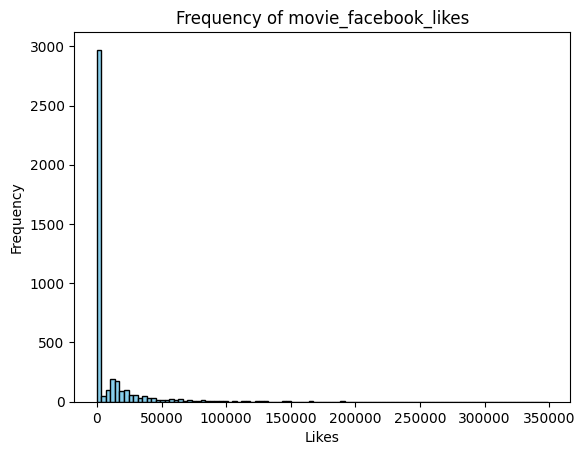

In [12]:
# print(f"Count before removing outliers: {df.shape}")
fn.boxplot_gross(df, 'gross')
fn.histogram_gross(df, 'gross')

for feature in featureVariables:
    if 'like' in feature:
        # print(f"Count before removing outliers: {df.shape}")
        fn.boxplot_likes(df, feature)
        fn.histogram_likes(df, feature)

## Onderzoeksvraag 1: In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB


### Scatterplots

**Bereken de numerieke variabelen tegenover de doelvariabele, zodat we kunnen zien welke kenmerken (enigszins) belangrijk zijn voor de doelvariabele**

In [13]:
correlation = df[featureVariables + targetVariable].corr()['gross'].sort_values(ascending=False)
print(correlation)

gross                       1.00
movie_facebook_likes        0.38
actor_3_facebook_likes      0.31
actor_2_facebook_likes      0.26
cast_total_facebook_likes   0.25
imdb_score                  0.20
actor_1_facebook_likes      0.15
director_facebook_likes     0.14
Name: gross, dtype: float64


**In alle plots hieronder staat bij X-as de Totale filmopbrengsten**

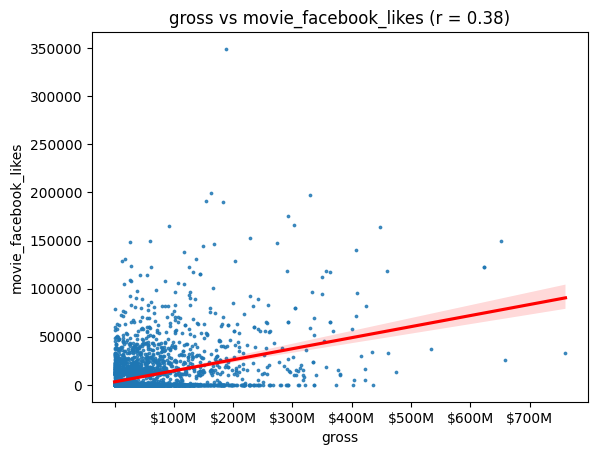

In [14]:
fn.correlation_plot(df, 'gross', 'movie_facebook_likes')

- Y-as: Aantal Facebook likes

- We zien dat de likes toeneemt wanneer filmopbregnsten toeneemt, betekent met een hogere opbrengsten ook een er een grotere kans dat de film meer aandacht krijgt op Facebook.

- In het plot zien we een positieve correlatie 0.38, betekent de aantal Facebook likes wel een voorspellen waarde heeft.

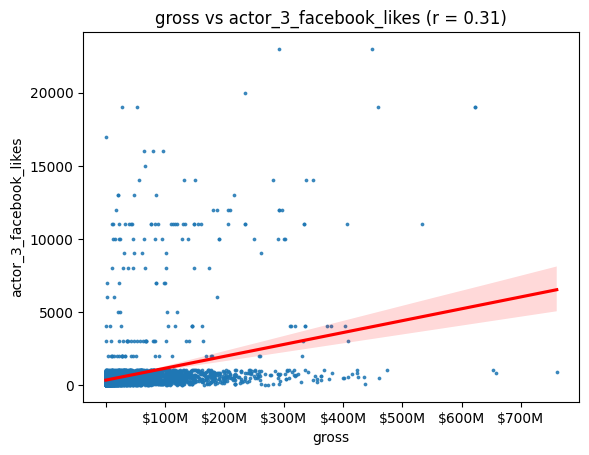

In [15]:
fn.correlation_plot(df, 'gross', 'actor_3_facebook_likes')

- Y-as: Aantal Facebook likes van Acteur 3

- We zien dat meeste punten zijn tussen 0 en 5000 likes ook als opbrengesten sterk toeneemt, betekent opbrengsten van de film weinig mee te maken met acteur 3. 

- In het plot zien we een positieve correlatie 0.31, betekent dan een matige correlatie maar hier heeft eigenlijk weinig zin om verder te onderzoeken.


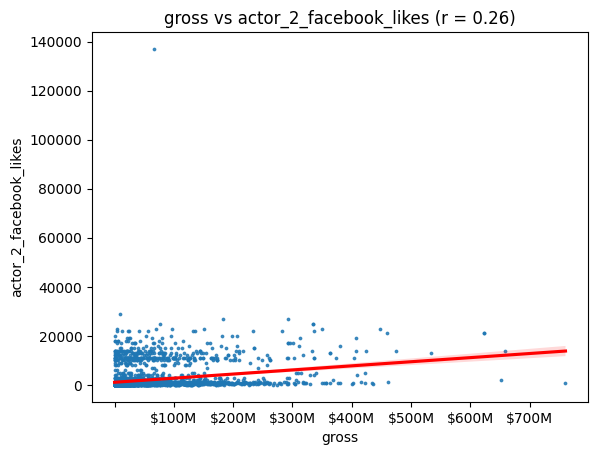

In [16]:
fn.correlation_plot(df, 'gross', 'actor_2_facebook_likes')

- Y-as: Aantal Facebook likes van Acteur 2

- We zien dat meeste punten zijn linksonder tussen 0 en 20000 likes, betekent ook als de opbrengsten toeneemt is de likes van acteur 2 niet hoog.

- In het plot zien we een positieve correlatie 0.26, een lichte correlatie, maar ook geen waarde om verder te onderzoeken.

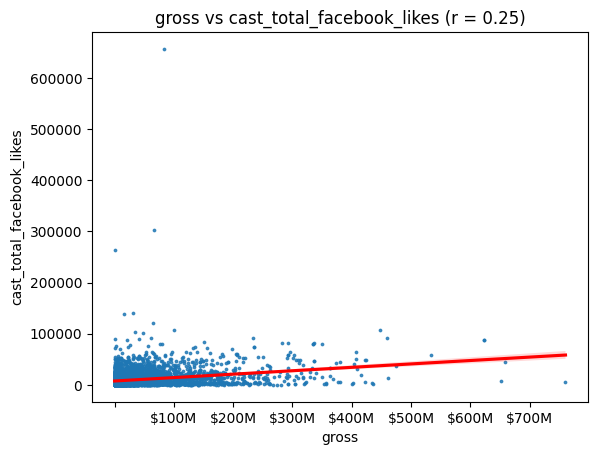

In [17]:
fn.correlation_plot(df, 'gross', 'cast_total_facebook_likes')

- Y-as: Aantal Facebook likes van cast

- We zien dat meeste punten zijn linksonder tussen 0 en 10000 likes, betekent ook als de film een hoog opbrengsten hebben, krijg de auteurs laag Facebook likes.

- In het plot zien we een positieve correlatie 0.25, beetje zwak.

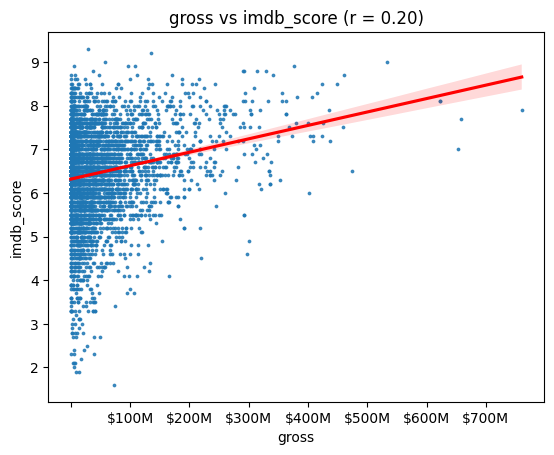

In [18]:
fn.correlation_plot(df, 'gross', 'imdb_score')

- Y-as: IMDb-score

- We zien dat meeste scores tussen 5 en 8, met een opbrengste minder dan 200M dollar, betekent hogere opbrengsten levert niet een hogere score.

- In het plot zien we een positieve correlatie 0.20, zwak, geen voorspelwaarde.

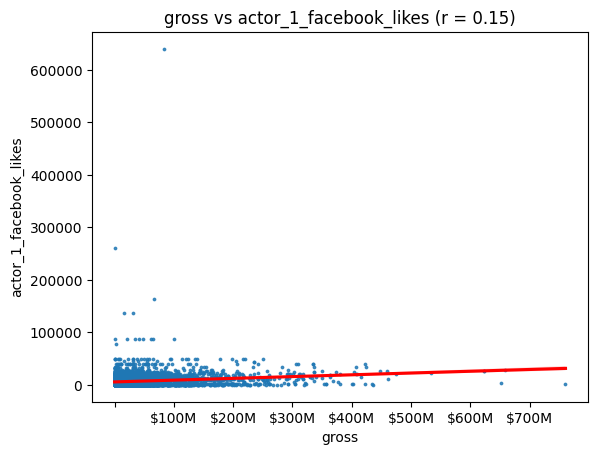

In [19]:
fn.correlation_plot(df, 'gross', 'actor_1_facebook_likes')

- Y-as: Aantal Facebook likes van Acteur 1

- We zien dat meeste punten zijn linksonder tussen 0 en 10000 likes, de likes vam auteur 1 heeft weinig mee te maken met de opbrengsten van de film.

- In het plot zien we een positieve correlatie 0.15, zwak, zwak.

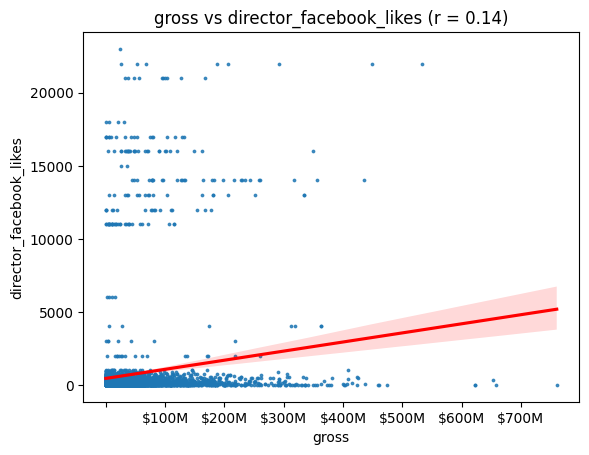

In [20]:
fn.correlation_plot(df, 'gross', 'director_facebook_likes')

- Y-as: Aantal Facebook likes van directeur

- De meeste datapunten zijn verzamel linksonder, maar verspreid beetje ook tussen 10000 en 20000 likes, dus de opbrengesten heeft weinig mee te maken met hoe bekend de directeur is.

- In het plot zien we een positieve correlatie 0.14, zwak, zwak.

**In alle plots hieronder staat bij X-as de IMDb Score**

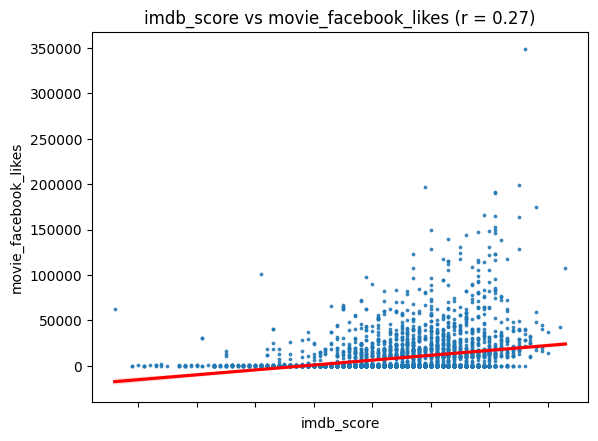

In [21]:
fn.correlation_plot(df, 'imdb_score', 'movie_facebook_likes')

- Y-as: Aantal Facebook likes van film

- We zien dat bij verhoging van IMDb-score is er geen echt verhoging van de Facebook likes, de datapunten verspreid.

- In het plot zien we een positieve correlatie 0.27, wel matige correlatie met elkaar, maar weinig zin om hiermee verder onderzoeken.

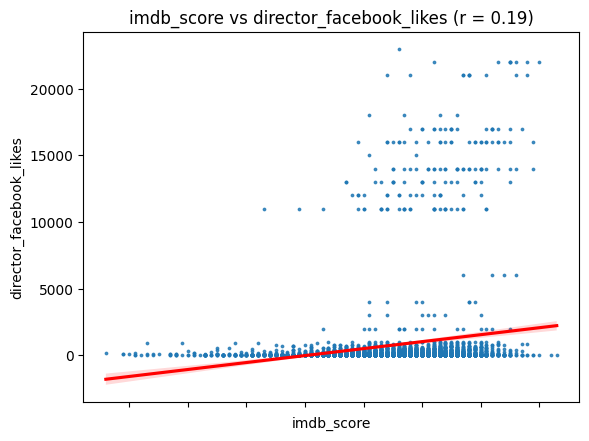

In [22]:
fn.correlation_plot(df, 'imdb_score','director_facebook_likes')

- Y-as: Aantal Facebook likes van directeur

- De datapunten verspreid helemaal en we zien in de plots meeste datapunten onder 5000 likes liggen. De scores heeft weinig mee te maken met hoe bekend de directeur is.

- In het plot zien we een positieve correlatie 0.19, zwak.

**Wijs dummywaarden toe aan alle namen. Dit is nodig om ons model te berekenen.**

In [23]:
#Selecteer numerieke kenmerkenvariabelen
numeric = df[['director_facebook_likes', 
                'actor_1_facebook_likes', 
                'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 
                'cast_total_facebook_likes', 'movie_facebook_likes', 'imdb_score',
                'gross'
                ]]

#We wijzen alle andere kolomwaarden toe aan dummywaarden. dfr is aan het begin gemaakt voor dataframe real (de hele dataset).
dummies = pd.get_dummies(dfr[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']], dtype = int)

#Voer de samenvoeging van de twee dataframes uit tot één dataframe. dfd staat voor dataframe dummies
dfd = pd.concat([numeric, dummies], axis = 1)

dfd.head(1)

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross,director_name_A. Raven Cruz,director_name_Aaron Hann,director_name_Aaron Schneider,director_name_Aaron Seltzer,director_name_Abel Ferrara,director_name_Adam Brooks,director_name_Adam Carolla,director_name_Adam Goldberg,director_name_Adam Green,director_name_Adam Jay Epstein,director_name_Adam Marcus,director_name_Adam McKay,director_name_Adam Rapp,director_name_Adam Rifkin,director_name_Adam Shankman,director_name_Adrian Lyne,director_name_Adrienne Shelly,director_name_Agnieszka Holland,director_name_Agnieszka Wojtowicz-Vosloo,director_name_Agustín Díaz Yanes,director_name_Aki Kaurismäki,director_name_Akira Kurosawa,director_name_Akiva Goldsman,director_name_Akiva Schaffer,director_name_Al Franklin,director_name_Al Silliman Jr.,director_name_Alain Resnais,director_name_Alan Alda,director_name_Alan Cohn,director_name_Alan J. Pakula,director_name_Alan Jacobs,director_name_Alan Metter,director_name_Alan Parker,director_name_Alan Poul,director_name_Alan Rudolph,director_name_Alan Shapiro,director_name_Alan Taylor,director_name_Alan Yuen,director_name_Albert Brooks,director_name_Albert Hughes,director_name_Alec Asten,director_name_Alejandro Agresti,director_name_Alejandro Amenábar,director_name_Alejandro G. Iñárritu,director_name_Alejandro Monteverde,director_name_Aleksandr Veledinskiy,director_name_Aleksey German,director_name_Alessandro Carloni,director_name_Alex Cox,director_name_Alex Craig Mann,director_name_Alex Garland,director_name_Alex Gibney,director_name_Alex Kendrick,director_name_Alex Proyas,director_name_Alex Ranarivelo,director_name_Alex Rivera,director_name_Alex Smith,director_name_Alex Zamm,director_name_Alex van Warmerdam,director_name_Alexander Payne,director_name_Alexander Witt,director_name_Alexandre Aja,director_name_Alfonso Cuarón,director_name_Alfred Hitchcock,director_name_Alice Wu,director_name_Alison Maclean,director_name_Alister Grierson,director_name_Allan Arkush,director_name_Allan Dwan,director_name_Allen Coulter,director_name_Allen Hughes,director_name_Allison Anders,director_name_Allison Burnett,director_name_Amal Al-Agroobi,director_name_Amanda Gusack,director_name_Amat Escalante,director_name_Amy Heckerling,director_name_Amy Holden Jones,director_name_Analeine Cal y Mayor,director_name_Anand Tucker,director_name_Andrea Arnold,director_name_Andrea Di Stefano,director_name_Andrei Tarkovsky,director_name_Andrew Adamson,director_name_Andrew Berends,director_name_Andrew Bergman,director_name_Andrew Bujalski,director_name_Andrew Currie,director_name_Andrew Davis,director_name_Andrew Dominik,director_name_Andrew Douglas,director_name_Andrew Erwin,director_name_Andrew Fleming,director_name_Andrew Haigh,director_name_Andrew Hyatt,director_name_Andrew Jarecki,director_name_Andrew Leman,director_name_Andrew Morahan,director_name_Andrew Niccol,director_name_Andrew Stanton,director_name_Andrew Steggall,director_name_Andrew Traucki,director_name_Andrew Wilson,director_name_Andrey Konchalovskiy,director_name_Andrey Zvyagintsev,director_name_Andrucha Waddington,director_name_Andrzej Bartkowiak,director_name_André Téchiné,director_name_André Øvredal,director_name_Andrés Couturier,director_name_Andrés Muschietti,director_name_Andy Cadiff,director_name_Andy Fickman,director_name_Andy Garcia,director_name_Andy Tennant,director_name_Ang Lee,director_name_Angela Robinson,director_name_Angelina Jolie Pitt,director_name_Angelo Pizzo,director_name_Anna Boden,director_name_Anna Mastro,director_name_Anna Muylaert,director_name_Annabel Jankel,director_name_Anne Fletcher,director_name_Anne Fontaine,director_name_Anthony Bell,director_name_Anthony C. Ferrante,director_name_Anthony Hemingway,director_name_Anthony Hickox,director_name_Anthony Mann,director_name_Anthony Minghella,director_name_Anthony O'Brien,director_name_Anthony Powell,director_name_Anthony Russo,director_n

Na het aanmaken van alle dummies zie je dat er heel wat kolommen bij zijn gekomen. Dit komt doordat waar een 1 staat bij de naam, deze de acteur facebook likes representeert en een 0 voor niet.

In [24]:
print(dfd.shape) #check impact

(5043, 11056)


### We gaan nu kijken naar alle likestatistieken per regisseur en acteur

Zoals je kunt zien, zijn er veel regisseurs en acteurs met grote films (hoge inkomsten) die nul likes krijgen op hun Facebook-pagina. Dit is vooral het geval bij regisseurs. We zullen hier uiteindelijk niks mee doen. Stel dat we deze waarden gaan invullen met het gemiddelde aantal likes van vergelijkbare films, gegroepeerd op basis van hun 'gross', dan kunnen wij handmatig een trend in de data stoppen die er misschien helemaal niet is.

In [25]:
likeList = []
grossList = []

for column in dfd.columns:
    if 'director_name' in column:

        rowsWithDirector = dfd[dfd[column] == 1]

        infoLikes = rowsWithDirector[['director_facebook_likes']]
        infoGross = rowsWithDirector[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['director'] = column
        describeGrossStats['director'] = column

        likeList.append(describeLikeStats)
        grossList.append(describeGrossStats)

directorLikeStats = pd.concat(likeList).reset_index(drop=True)
directorGrossStats = pd.concat(grossList).reset_index(drop=True)

directorStats = pd.merge(directorLikeStats, directorGrossStats, on='director', how='outer')

directorStats = directorStats.sort_values(by='likes_mean', ascending=True)

directorStats.head(10)
        

,likes_count,likes_mean,likes_std,likes_min,likes_25%,likes_50%,likes_75%,likes_max,director,gross_count,gross_mean,gross_std,gross_min,gross_25%,gross_50%,gross_75%,gross_max
751,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,director_name_Gene Quintano,1.00,"27,979,400.00",NaN,"27,979,400.00","27,979,400.00","27,979,400.00","27,979,400.00","27,979,400.00"
1751,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,director_name_Paul Thomas Anderson,6.00,"21,886,070.00","10,899,612.02","8,093,318.00","16,730,713.25","20,121,003.00","25,401,433.00","40,218,903.00"
1074,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,director_name_Joel Edgerton,2.00,"43,771,291.00",0.00,"43,771,291.00","43,771,291.00","43,771,291.00","43,771,291.00","43,771,291.00"
1073,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,director_name_Joel Coen,4.00,"25,227,835.25","18,878,364.37","2,869,369.00","13,796,714.50","26,267,676.50","37,698,797.25","45,506,619.00"
1759,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,director_name_Pedro Almodóvar,1.00,"12,899,702.00",NaN,"12,899,702.00","12,899,702.00","12,899,702.00","12,899,702.00","12,899,702.00"
1054,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,director_name_Jodie Foster,3.00,"19,828,357.00","20,124,796.65","958,319.00","9,238,269.50","17,518,220.00","29,263,376.00","41,008,532.00"
1764,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,director_name_Pete Docter,3.00,"313,113,780.33","37,565,467.49","289,907,418.00","291,443,487.00","292,979,556.00","324,716,961.50","356,454,367.00"
302,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,director_name_Catherine Gund,1.00,"21,199.00",NaN,"21,199.00","21,199.00","21,199.00","21,199.00","21,199.00"
1769,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,director_name_Peter Billingsley,1.00,"109,176,215.00",NaN,"109,176,215.00","109,176,215.00","109,176,215.00","109,176,215.00","109,176,215.00"
597,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,director_name_Doug Block,1.00,"84,689.00",NaN,"84,689.00","84,689.00","84,689.00","84,689.00","84,689.00"


In [26]:
likeActor1List = []
grossActor1List = []

for column in dfd.columns:
    if 'actor_1' in column:

        rowsWithActor1 = dfd[dfd[column] == 1]

        infoLikes = rowsWithActor1[['actor_1_facebook_likes']]
        infoGross = rowsWithActor1[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['actor1'] = column
        describeGrossStats['actor1'] = column
        
        likeActor1List.append(describeLikeStats)
        grossActor1List.append(describeGrossStats)

actor1LikeStats = pd.concat(likeActor1List).reset_index(drop=True)
actor1GrossStats = pd.concat(grossActor1List).reset_index(drop=True)

actor1Stats = pd.merge(actor1LikeStats, actor1GrossStats, on='actor1', how='outer')

actor1Stats = actor1Stats.sort_values(by='likes_mean', ascending=True)

actor1Stats.head(10)

,likes_count,likes_mean,likes_std,likes_min,likes_25%,likes_50%,likes_75%,likes_max,actor1,gross_count,gross_mean,gross_std,gross_min,gross_25%,gross_50%,gross_75%,gross_max
727,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Heather Berman,1.00,"8,044,906.00",NaN,"8,044,906.00","8,044,906.00","8,044,906.00","8,044,906.00","8,044,906.00"
1992,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Tshewang Dendup,1.00,"505,295.00",NaN,"505,295.00","505,295.00","505,295.00","505,295.00","505,295.00"
80,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Ami Ayalon,1.00,"2,408,553.00",NaN,"2,408,553.00","2,408,553.00","2,408,553.00","2,408,553.00","2,408,553.00"
282,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Carol Block,1.00,"84,689.00",NaN,"84,689.00","84,689.00","84,689.00","84,689.00","84,689.00"
321,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Chemeeka Walker,1.00,"11,529,368.00",NaN,"11,529,368.00","11,529,368.00","11,529,368.00","11,529,368.00","11,529,368.00"
128,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Ariel Hsing,1.00,"5,858.00",NaN,"5,858.00","5,858.00","5,858.00","5,858.00","5,858.00"
571,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Elizabeth Streb,1.00,"21,199.00",NaN,"21,199.00","21,199.00","21,199.00","21,199.00","21,199.00"
1437,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Naderev Sano,1.00,"4,914.00",NaN,"4,914.00","4,914.00","4,914.00","4,914.00","4,914.00"
753,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_1_name_Ian Gamazon,1.00,"70,071.00",NaN,"70,071.00","70,071.00","70,071.00","70,071.00","70,071.00"
1854,1.00,2.00,NaN,2.00,2.00,2.00,2.00,2.00,actor_1_name_Stephen Carr,1.00,"3,000,000.00",NaN,"3,000,000.00","3,000,000.00","3,000,000.00","3,000,000.00","3,000,000.00"


In [27]:
likeActor2List = []
grossActor2List = []

for column in dfd.columns:
    if 'actor_2' in column:

        rowsWithActor2 = dfd[dfd[column] == 1]

        infoLikes = rowsWithActor2[['actor_2_facebook_likes']]
        infoGross = rowsWithActor2[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['actor2'] = column
        describeGrossStats['actor2'] = column
        
        likeActor2List.append(describeLikeStats)
        grossActor2List.append(describeGrossStats)

actor2LikeStats = pd.concat(likeActor2List).reset_index(drop=True)
actor2GrossStats = pd.concat(grossActor2List).reset_index(drop=True)

actor2Stats = pd.merge(actor2LikeStats, actor2GrossStats, on='actor2', how='outer')

actor2Stats = actor2Stats.sort_values(by='likes_mean', ascending=True)

actor2Stats.head(10)

,likes_count,likes_mean,likes_std,likes_min,likes_25%,likes_50%,likes_75%,likes_max,actor2,gross_count,gross_mean,gross_std,gross_min,gross_25%,gross_50%,gross_75%,gross_max
3032,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Zubaida Sahar,1.00,"1,127,331.00",NaN,"1,127,331.00","1,127,331.00","1,127,331.00","1,127,331.00","1,127,331.00"
848,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Edgar Tancangco,1.00,"70,071.00",NaN,"70,071.00","70,071.00","70,071.00","70,071.00","70,071.00"
880,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Ellen Block,1.00,"84,689.00",NaN,"84,689.00","84,689.00","84,689.00","84,689.00","84,689.00"
935,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Eva Carrozza,1.00,"8,044,906.00",NaN,"8,044,906.00","8,044,906.00","8,044,906.00","8,044,906.00","8,044,906.00"
942,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Evelyn Jefferson,1.00,"1,111.00",NaN,"1,111.00","1,111.00","1,111.00","1,111.00","1,111.00"
2485,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Ronny Dayag,1.00,"2,283,276.00",NaN,"2,283,276.00","2,283,276.00","2,283,276.00","2,283,276.00","2,283,276.00"
2899,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Val Kilmer,1.00,"17,473,245.00",NaN,"17,473,245.00","17,473,245.00","17,473,245.00","17,473,245.00","17,473,245.00"
2405,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Richard Linklater,1.00,"1,227,508.00",NaN,"1,227,508.00","1,227,508.00","1,227,508.00","1,227,508.00","1,227,508.00"
1085,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Guillaume Denaiffe,1.00,"4,074,023.00",NaN,"4,074,023.00","4,074,023.00","4,074,023.00","4,074,023.00","4,074,023.00"
793,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_2_name_Donald Austin,1.00,"111,300.00",NaN,"111,300.00","111,300.00","111,300.00","111,300.00","111,300.00"


In [28]:
likeActor3List = []
grossActor3List = []

for column in dfd.columns:
    if 'actor_3' in column:
        rowsWithActor3 = dfd[dfd[column] == 1]

        infoLikes = rowsWithActor3[['actor_3_facebook_likes']]
        infoGross = rowsWithActor3[['gross']]

        describeLikeStats = infoLikes.describe(include='all').transpose()
        describeGrossStats = infoGross.describe(include='all').transpose()

        describeLikeStats = describeLikeStats.add_prefix('likes_')
        describeGrossStats = describeGrossStats.add_prefix('gross_')

        describeLikeStats['actor3'] = column
        describeGrossStats['actor3'] = column
        
        likeActor3List.append(describeLikeStats)
        grossActor3List.append(describeGrossStats)

actor3LikeStats = pd.concat(likeActor3List).reset_index(drop=True)
actor3GrossStats = pd.concat(grossActor3List).reset_index(drop=True)

actor3Stats = pd.merge(actor3LikeStats, actor3GrossStats, on='actor3', how='outer')

actor3Stats = actor3Stats.sort_values(by='likes_mean', ascending=True)

actor3Stats.head(10)

,likes_count,likes_mean,likes_std,likes_min,likes_25%,likes_50%,likes_75%,likes_max,actor3,gross_count,gross_mean,gross_std,gross_min,gross_25%,gross_50%,gross_75%,gross_max
2419,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Mike Brett,1.00,"4,914.00",NaN,"4,914.00","4,914.00","4,914.00","4,914.00","4,914.00"
2794,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Renee Leblanc,1.00,"592,014.00",NaN,"592,014.00","592,014.00","592,014.00","592,014.00","592,014.00"
2455,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Mohamad Haref Harati,1.00,"1,127,331.00",NaN,"1,127,331.00","1,127,331.00","1,127,331.00","1,127,331.00","1,127,331.00"
586,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Chloe Hollings,1.00,"4,074,023.00",NaN,"4,074,023.00","4,074,023.00","4,074,023.00","4,074,023.00","4,074,023.00"
3149,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Steve Burg,1.00,"12,995,673.00",NaN,"12,995,673.00","12,995,673.00","12,995,673.00","12,995,673.00","12,995,673.00"
1718,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_John Reeves,1.00,"1,111.00",NaN,"1,111.00","1,111.00","1,111.00","1,111.00","1,111.00"
3125,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Stellan Skarsgård,1.00,"64,148.00",NaN,"64,148.00","64,148.00","64,148.00","64,148.00","64,148.00"
2820,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Richard Spore,1.00,"203,134.00",NaN,"203,134.00","203,134.00","203,134.00","203,134.00","203,134.00"
213,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Anna Vareschi,1.00,"365,734.00",NaN,"365,734.00","365,734.00","365,734.00","365,734.00","365,734.00"
467,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,actor_3_name_Béatrice Bonifassi,1.00,"7,002,255.00",NaN,"7,002,255.00","7,002,255.00","7,002,255.00","7,002,255.00","7,002,255.00"


## Modellen ##

Hier gaan we de modellen toepassen op onze data. 

Als eerst gaan we de belangrijke imports hier defineren en alvast een train test split maken.

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df[featureVariables]
y = df[targetVariable]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

Baseline.

Een baseline score is nodig om te kijken hoe ver onze modellen hiervan afwijken. Als de score eronder zit doet het model het beter dan de baseline model wat goed is, als de score erboven zit doet het model het slechter en is dit een reden om dat model niet te gaan gebruiken.

De baseline bereken je met de 'mean_squared_error' uitgedrukt in MSRE.

In [30]:
baseline = np.mean(y_train)

y_pred = np.ones(len(X_test)) * baseline

baseline_score = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {baseline_score:.2f}")

RMSE: 69771005.94


C:\Users\pim-d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Als eerst gaan we linieare regressie toepassen. 
De data gaan we ook normaliseren. Normaliseren is nodig om het linieare regressie model beter te laten werken omdat het model werkt op relatieve afstanden van elkaar.
Bij dit model hebben we niet gekozen voor hyperparameters, dit model is vrij simpel en geeft alleen een directe oplossing door de normale vergelijking.

De uitkomst van dit model is 58977858.91 en zit met 14,94% onder het baseline model wat goed is. 
de R-squared is 0.28. Dit model kan ongeveer 28% van de variatie in de variabele kan verklaren. Dit is niet al te best. Dit duid op een niet linieare relatie. (dit hadden we ook gezien bij de correlatie plots)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
import sklearn.linear_model as lm
from sklearn.metrics import r2_score

# Maak een lineaire regressie model aan
lr = lm.LinearRegression()

# Fit het model met de trainings data
lr.fit(X_train_scaled, y_train)

# Bereken de voorspellingen voor de test data
y_pred = lr.predict(X_test_scaled)

# Bereken de RMSE
lr_score = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {lr_score:.2f}")

# Bereken de R^2 score voor het regressiemodel
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 58977858.91
R-squared: 0.29


C:\Users\pim-d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hier gaan we KNN toepassen. De hyperparameters zijn n_neighbors=5, weights="distance", p=2
We hebben gekozen voor N_neighbors=6 want hier zit de 'knik'. Dit betekent dat dit het 'beste' model is zonder te overfitten.
Ook hebben we gekozen voor p=2. Dit neemt de euclidische afstand, ipv p=1 de minkowski afstand. Dit geeft voor onze dataset het beste resultaat.

De uitkomst van dit model is 60222465.80, wat met 12,98% boven het baseline model zit wat goed is. En een R-squared van 0.25 wat aangeeft dat dit model ongeveer 28% van de variatie in de variabele kan verklaren.

C:\Users\pim-d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pim-d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pim-d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

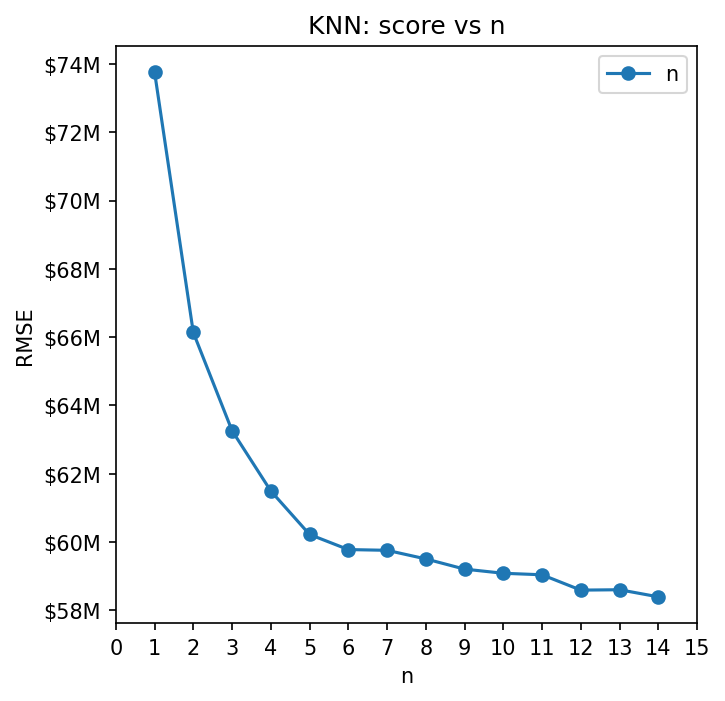

In [48]:
from sklearn.neighbors import KNeighborsRegressor

data = []

max_n = 15

for i in range(1, max_n):
    knn = KNeighborsRegressor(n_neighbors=i, weights="distance", p=2)

    # Fitten met trainingsdaata
    knn.fit(X_train_scaled, y_train)

    # Bereken de voorspellingen
    y_pred = knn.predict(X_test_scaled)

    # Bereken de RMSE
    knn_score = mean_squared_error(y_test, y_pred, squared=False)

    data.append([i, knn_score])

df_knn = pd.DataFrame(data, columns=['n', 'RMSE'])

fig = plt.figure(figsize=(5,5), dpi=150)

# object axes: de grafiekbasis
ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='n',
       ylabel='RMSE',
       title='KNN: score vs n')

ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.ticklabel_format(useOffset=False)
ax.plot(df_knn['n'], df_knn['RMSE'], '-o')

ax.yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

ax.legend(['n'])

In [50]:
# KNN regressie model met hyperparameters
knn = KNeighborsRegressor(n_neighbors=5, weights="distance", p=2)

# Fitten met trainingsdaata
knn.fit(X_train_scaled, y_train)

# Bereken de voorspellingen
y_pred = knn.predict(X_test_scaled)

# Bereken de RMSE
knn_score = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {knn_score:.2f}")

# Bereken de R^2 score voor het KNN model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 60222465.80
R-squared: 0.25


C:\Users\pim-d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Conclusie onderzoeksvraag 1

Het lineaire regressiemodel presteert beter dan zowel het baseline model als het KNN model, met een 14,94% lagere RMSE ten opzichte van het baseline model. De lage R-squared waarde van 0.28 van het lineaire model geeft echter aan dat er veel variatie in de omzet niet verklaard kan worden door onze gebruikte features.

Hiermee concluderen we dat de omzet van een film niet te voorspellen is op basis van de populariteit op facebook en IMDB.

## Onderzoeksvraag 2: Is het mogelijk om te voorspellen of een film een oscar zal winnen of niet?

Een oscar winnen is een hele eer in de filmindustrie. Het is dus zeer interessant of we wellicht een model kunnen bouwen welke film een oscar zou winnen of niet. Wellicht kunnen we zo een accuraat model bouwen dat het miljarden waard zou zijn. En aangezien elke regrisseur die gefocust is op roem dit graag zou willen weten. Laten we van start gaan! En wellicht rijk worden!

In [35]:
# Inladen db

odb = pd.read_csv('data/the_oscar_award.csv')

In [36]:
# Check of alles correct is ingeladen

odb.sample(5)

,year_film,year_ceremony,ceremony,category,name,film,winner
1694,1944,1945,17,DIRECTING,Henry King,Wilson,False
10140,2017,2018,90,HONORARY AWARD,Donald Sutherland for a lifetime of indelible...,NaN,True
10055,2017,2018,90,DOCUMENTARY (Feature),"Steve James, Mark Mitten and Julie Goldman",Abacus: Small Enough to Jail,False
7489,1995,1996,68,FILM EDITING,Steven Rosenblum,Braveheart,False
7491,1995,1996,68,FILM EDITING,Richard Francis-Bruce,Seven,False


We zien hier 7 tabellen terug de Target waarop wij gaan focussen is de 'Winner' tabel. Daarin kunnen we zien of een film een oscar heeft gewonnen of niet.

In [37]:
odb.describe()

,year_film,year_ceremony,ceremony
count,"10,889.00","10,889.00","10,889.00"
mean,"1,976.61","1,977.61",49.63
std,27.36,27.36,27.32
min,"1,927.00","1,928.00",1.00
25%,"1,952.00","1,953.00",25.00
50%,"1,976.00","1,977.00",49.00
75%,"2,001.00","2,002.00",74.00
max,"2,023.00","2,024.00",96.00


Hieruit volgt dat tabel 'ceremony' gewoonweg bijhoudt hoeveel keer de oscar awards zijn gehouden.

In [38]:
odb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 521.2+ KB


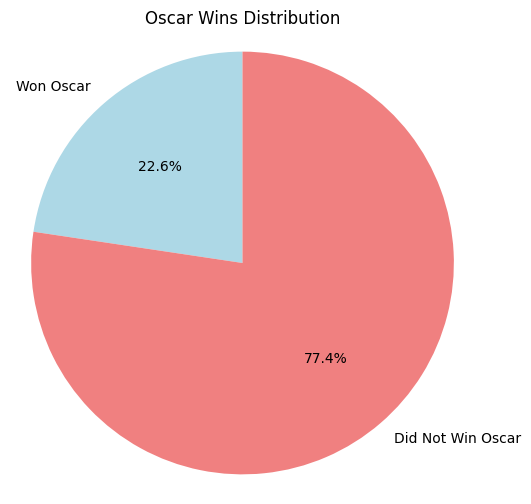

In [39]:
# Check hoeveel True en False er zijn in de Winner tabel
true_count = odb['winner'].value_counts()[True]
false_count = odb['winner'].value_counts()[False]

# Benaming voor de taart diagram
labels = ['Won Oscar', 'Did Not Win Oscar']

# Data om te plotten
sizes = [true_count, false_count]

# Maak taart diagram
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Oscar Wins Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We zien dus dat minder dan een vierde van de genomineerde een Oscar wint. Maar waar we natuurlijk ook naar moeten kijken is hoe groot de kans is om uberhaupt genomineerd te worden. Daarvoor zullen we de 2 datasets moeten mergen. 

### Databases mergen

We gaan de databases mergen op de 'movie_titel' tabel en de 'name' tabel. We joinen met 'left'.

In [40]:
merged_df = pd.merge(dfr, odb, left_on='movie_title', right_on='name', how='left')

In [41]:
merged_df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,year_film,year_ceremony,ceremony,category,name,film,winner
1137,Color,Ben Affleck,656.00,130.00,0.00,650.00,Scoot McNairy,"1,000.00","136,019,448.00",Biography|Drama|History|Thriller,Clea DuVall,Argo,452465,3133,Tate Donovan,1.00,1970s|cia|f word|u.s. embassy|year 1979,http://www.imdb.com/title/tt1024648/?ref_=fn_t...,695.00,English,USA,R,"44,500,000.00","2,012.00",660.00,7.70,2.35,89000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,Color,Jon Stewart,129.00,103.00,593.00,241.00,Claire Foy,374.00,"3,093,491.00",Biography|Drama,Numan Acar,Rosewater,8307,1283,Haluk Bilginer,0.00,based on true story|hijab|journalism|prison|re...,http://www.imdb.com/title/tt2752688/?ref_=fn_t...,37.00,English,USA,R,"5,000,000.00","2,014.00",362.00,6.60,1.85,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Color,James Mangold,283.00,117.00,446.00,877.00,Marc Blucas,"10,000.00","76,418,654.00",Action|Comedy|Romance,Tom Cruise,Knight and Day,148280,12731,Jordi Mollà,0.00,chase|fbi|garage|spy|surveillance,http://www.imdb.com/title/tt1013743/?ref_=fn_t...,348.00,English,USA,PG-13,"117,000,000.00","2,010.00",973.00,6.30,2.35,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3640,Color,Peter Cattaneo,47.00,107.00,11.00,419.00,Olivia Williams,773.00,"54,606.00",Comedy|Crime|Romance,James Nesbitt,Lucky Break,1940,2440,Peter McNamara,0.00,escape|prison|prison escape|sadism|solitary co...,http://www.imdb.com/title/tt0246134/?ref_=fn_t...,34.00,English,UK,PG-13,"6,000,000.00","2,001.00",766.00,6.20,2.35,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4659,Color,Asghar Farhadi,354.00,123.00,0.00,620.00,Leila Hatami,786.00,"7,098,492.00",Drama|Mystery,Shahab Hosseini,A Separation,151812,2501,Peyman Moaadi,2.00,alzheimer's disease|caregiver|divorce|iran|ira...,http://www.imdb.com/title/tt1832382/?ref_=fn_t...,264.00,Persian,Iran,PG-13,"500,000.00","2,011.00",712.00,8.40,1.85,48000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Aantal films waarbij ze een oscar hebben gewonnen
true_winners = merged_df['winner'].sum()

# Resultaat afdrukken
print(f"Aantal films die een Oscar hebben gewonnen: {true_winners}")

Aantal films die een Oscar hebben gewonnen: 0


## Conclusie onderzoeksvraag 2

De data is dus niet goed gemerged en zal verder onderzocht moeten worden

## Onderzoeksvraag 3: Hoe kunnen budget en omzet worden gebruikt om logische clusters van de films te vinden?


**Wij delen de films in 5 Categorieën.**

1. Blockbuster: hoog budget met hoge omzet
2. Flop: hoog budget met lage omzet
3. Cultfilm: laag budget met hoge omzet
4. Mid-Range Movie: Gemiddeld budget met gemiddelde omzet
5. Average: Alle andere gevallen

In [43]:
# In volledige dataFrame, alle NaN waarde verwijderen van budget en gross.
df_cleaned = dfr[['budget', 'gross']].dropna()

# Extreme waarde van budget en gross worden ook verwijderd.
df_cleaned = df_cleaned[(df_cleaned['budget'] < 350000000) & (df_cleaned['gross'] < 1000000000)] \

# Zie functies.py voor de functie classify_movie
df_cleaned['Category'] = df_cleaned.apply(fn.classify_movie, axis=1)

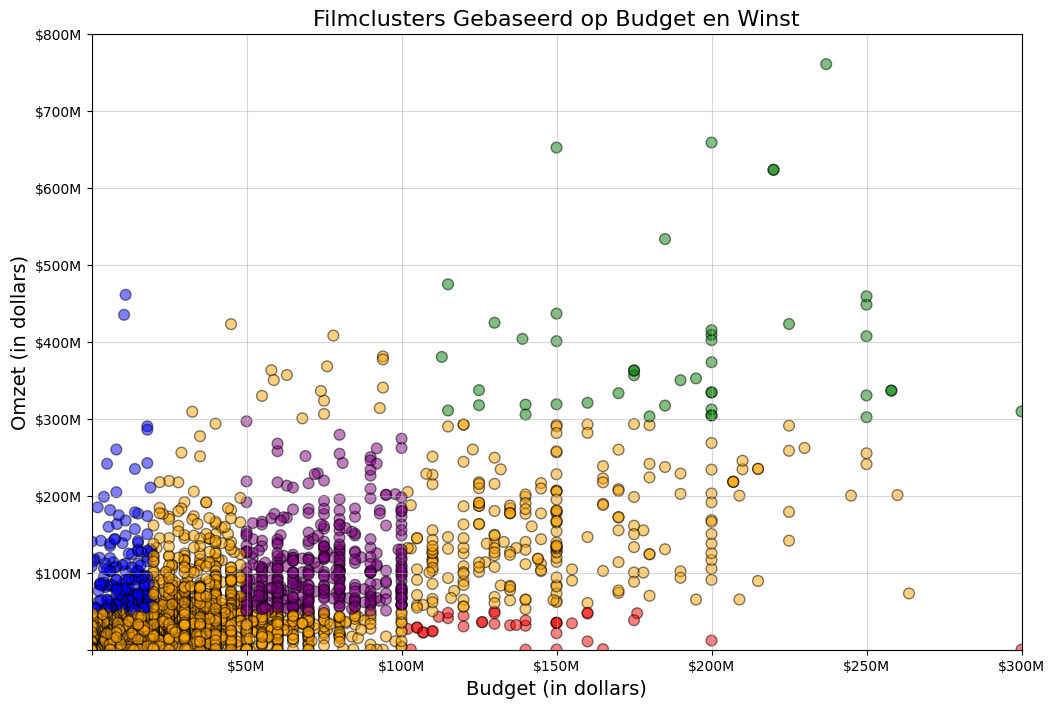

In [44]:
# Scatterplot Visualiseren met kleur
plt.figure(figsize=(12, 8))
colors = {'Blockbuster':'green', 'Flop':'red', 'Cultfilm':'blue', 'Average':'orange', 'Mid-Range Movie':'purple'}
scatter = plt.scatter(df_cleaned['budget'], df_cleaned['gross'], 
                      c=df_cleaned['Category'].map(colors), alpha=0.5, s=60, edgecolor='k', marker='o')

# Titel en labels
plt.title('Filmclusters Gebaseerd op Budget en Winst', fontsize=16)
plt.xlabel('Budget (in dollars)', fontsize=14)
plt.ylabel('Omzet (in dollars)', fontsize=14)

# Weergavegrenzen
plt.xlim(0, 300000000)  
plt.ylim(0, 800000000) 

# Grafiek lijn
plt.grid(True, linestyle='-', alpha=0.5)

plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

plt.show()

**Kleur en kermerken van de clusters in de scatterplot**

- **Groen: blockbuster films**

Deze films zijn met een hoog budget (> 100 miljoen dollar) en met een hoge omzet (>300 miljoen dollar).

We zien groene cluster rechterboven in de grafiek. De succesvolle films.


- **Rood: flop films**

Deze films zijn met een hoog budget (> 100 miljoen dollar) en met een lage omzet (<50 miljoen dollar).

We zien rode cluster rechtsonder in de grafiek. Deze is een klein cluster.


- **Blauw: cultfilms**

Deze films zijn met een laag budget (<20 miljoen dollar) en met een relatief hoge omzet (>50 miljoen dollar).

We zien blauwe cluster linkerboven in de grafiek. Dit cluster laten zien de films met een laag budget toch tot een groot succes kan zijn.


- **Paars: mid range films**

Deze films zijn met een middelgroot budget (50-100 miljoen dollar) en met een middelgroot omzet (50-300 miljoen dollar).

We zien paarse cluster midden in de grafiek. Deze is een groot cluster, betekent er zijn heel veel prima films.


- **Orange: rest van de films**

Alle film die niet in bovenstaande categorieën.

We zien orange cluster verspreid over de grafiek. Er zijn heel veel films die gewoon middelmatige resultaten halen, dus niet te ondersheiden in budget of omzet.



## Conclusie onderzoeksvraag 3


**Deze scatterplot toont duidelijk verschillende filmclusters op basis van budget en opbrengst.**